In [1]:
from difeomorfismos_solvers import *
from difeomorfismo import *
init_printing()

<H3>Difeomorsimos Cuadratico + lineal </H3>
<H3>$X^{c} = M_{dd}^{c}E^{d}E^{d}$<H3>
<H3>$Y_{c} = N_{cee}I^{e}I^{e}$</H3>



<H3>Defino la dimension que utilizare</H3>

In [2]:
n=2


<H3>Estos son las dos coordenadas del difeomorfismo</H3>

In [3]:
ZE, ZX = set_coordinates(n)
ZE, ZX

<H3>Estas son las constates para las ecuaciones del difeomorfismo Cuadratico + lineal</H3>

In [4]:
import operator
A,c1=set_constants_a(n,'A',0)
D,c2=set_constants_a(n,'D',0)
B,c3=set_constants_axb(n,n,'B',0)
G,c4=set_constants_axb(n,n,'G',0)
C,c5=set_constants_axb(n,n,'C',0)
Hc,c6=set_constants_axb(n,n,'H',0)
M,c7=set_constants_axbxc(n,n,n,'M',1,operator.eq)
N,c8=set_constants_axbxc(n,n,n,'N',1,operator.eq)

In [5]:
#M[0][1,0]=0
#M[1][0,1]=0
#N[0][1,0]=0
#N[1][0,1]=0

#M[0][0,0]=-1*M[1][0,0]*N[1][1,1]/N[0][1,1]
#M[0][1,1]=-1*N[1][0,0]*M[1][1,1]/N[0][0,0]
#M[0][1,0]=-1*N[1][0,1]*M[1][1,0]/N[0][0,1]


In [6]:
M,N

⎛⎡⎡M₁₁₁   0  ⎤, ⎡M₂₁₁   0  ⎤⎤, ⎡⎡N₁₁₁   0  ⎤, ⎡N₂₁₁   0  ⎤⎤⎞
⎜⎢⎢          ⎥  ⎢          ⎥⎥  ⎢⎢          ⎥  ⎢          ⎥⎥⎟
⎝⎣⎣ 0    M₁₂₂⎦  ⎣ 0    M₂₂₂⎦⎦  ⎣⎣ 0    N₁₂₂⎦  ⎣ 0    N₂₂₂⎦⎦⎠

Combo ganador para GIII, no borrar

In [7]:
#M,c7=set_constants_axbxc(n,n,n,'M',1,operator.eq)
#N,c8=set_constants_axbxc(n,n,n,'N',1,operator.eq)
M[0][1,1]=0
M[1][0,0]=0
N[0][1,1]=0
N[1][0,0]=0

<H3>Estas instrucciones son obtener las expresiones para $h_{ab}$ y $f$</H3>

In [8]:
h_LD=[]
f_LD=[]
EQ_LD = []
f = zeros(n)
h = zeros(n)
for x in range(0,n):
    for y in range(0,n):
        if x == y: f[x,y]=1/Function('f_{'+str(x+1)+str(y+1)+str('}'))(*ZX)
        if x == y: h[x,y]=Function('h_{'+str(x+1)+str(y+1)+str('}'))(*ZE)

In [92]:
h_LD=[]
f_LD=[]
EQ_LD = []
f = zeros(n)
h = zeros(n)
f,h,EQ = matrix_gtdieGIII(B,C,Hc,G,M,N,ZE)

In [93]:
f = h

In [9]:
f

⎡            1                                       ⎤
⎢─────────────────────────              0            ⎥
⎢f_{11}(F, X₁, X₂, Y₁, Y₂)                           ⎥
⎢                                                    ⎥
⎢                                       1            ⎥
⎢            0              ─────────────────────────⎥
⎣                           f_{22}(F, X₁, X₂, Y₁, Y₂)⎦

In [10]:
h_LD.append(h)
f_LD.append(f)

<H3>Estas son las ecuaciones del difeomorfismo Cuadratico + lineal</H3>

In [11]:
M,N

⎛⎡⎡M₁₁₁  0⎤, ⎡0   0  ⎤⎤, ⎡⎡N₁₁₁  0⎤, ⎡0   0  ⎤⎤⎞
⎜⎢⎢       ⎥  ⎢       ⎥⎥  ⎢⎢       ⎥  ⎢       ⎥⎥⎟
⎝⎣⎣ 0    0⎦  ⎣0  M₂₂₂⎦⎦  ⎣⎣ 0    0⎦  ⎣0  N₂₂₂⎦⎦⎠

In [12]:
LD = []
L0 = mixed_difeomorphism00(A,B,C,D,G,Hc,M,N,n,ZX,ZE)
LD.append(L0)
Matrix(LD[0])

⎡F(\Phi, E₁, E₂, I₁, I₂)⎤
⎢                       ⎥
⎢         2             ⎥
⎢       E₁ ⋅M₁₁₁        ⎥
⎢                       ⎥
⎢         2             ⎥
⎢       E₂ ⋅M₂₂₂        ⎥
⎢                       ⎥
⎢         2             ⎥
⎢       I₁ ⋅N₁₁₁        ⎥
⎢                       ⎥
⎢         2             ⎥
⎣       I₂ ⋅N₂₂₂        ⎦

<H3>Estas son las ecuaciones del contactomorfismo</H3>

In [14]:
CM_LD = contactomorphism_equations(LD[0],ZE,expand,f)

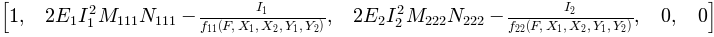

In [26]:
CM_LD

<H3>Este es el jacobiano y el determinante del jacobiano de esa transformacion</H3>

In [27]:
Z0 = list(LD[0])
Z0[0] = CM_LD

In [28]:
Ja = Matrix(LD[0]).jacobian(ZE)

In [29]:
DeJ = Ja.berkowitz_det()

In [30]:
for x in range(0,2*n+1):
    DeJ = DeJ.subs([(diff(LD[0][0],ZE[x]),CM_LD[x])])


In [31]:
D_LD = []
D_LD.append(DeJ)

In [32]:
Ja

⎡1      0          0          0          0    ⎤
⎢                                             ⎥
⎢0  2⋅E₁⋅M₁₁₁      0          0          0    ⎥
⎢                                             ⎥
⎢0      0      2⋅E₂⋅M₂₂₂      0          0    ⎥
⎢                                             ⎥
⎢0      0          0      2⋅I₁⋅N₁₁₁      0    ⎥
⎢                                             ⎥
⎣0      0          0          0      2⋅I₂⋅N₂₂₂⎦

In [33]:
simplify(DeJ)

<H3>Para cada una de las soluciones calculamos: Las ecuaciones del difeomorfismo en S, Las ecuaciones del contatcto morfismo en H. Las condiciones de integrabilidad check_me</H3>

In [20]:
check_me = []
difeo_eqs = []

for i in range(0,len(LD)):
    Z0 = LD[i]
    h = h_LD[0]
    f = f_LD[0]
    H=[]
    S = zeros(n)
    H,S = difeomorphism_equations002(Z0,ZE,expand,f,h,0,2*n+1)
    Z0[0] = ZE[0]
    #H1,S1 = difeomorphism_equations005(Z0,ZE,simplify,f,h,0,2*n+1)
    
    mixed_test = []
    t3 = 0
    t1 = t2 = 1
    for x in range(0,2*n+1):
        for y in range(x,2*n+1):
            if x != y:
                t1 = simplify(diff(H[x][1],ZE[y]))
                t2 = simplify(diff(H[y][1],ZE[x]))
                d1 = diff(H[x][0],ZE[y])
                d2 = diff(H[y][0],ZE[x])
                t3 = t3 + t1 + t2
                mixed_test.append((t1,t2))
    if t3 != 0:
        difeo_eqs.append((S,H,Z0,D_LD[i],f))
        check_me.append(mixed_test)
    #,ZE[y],ZE[x],,ZE[x],ZE[y]

In [21]:
#H1+S1

In [22]:
len(difeo_eqs)

<H3>Estas son las condiciones de integrabilidad</H3>

In [23]:
Matrix(check_me[0])

⎡                      0                        0⎤
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                                1               ⎥
⎢4⋅E₁⋅I₁⋅M₁₁₁⋅N₁₁₁ - ─────────────────────────  0⎥
⎢                    f_{11}(F, X₁, X₂, Y₁, Y₂)   ⎥
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                      0                        0⎥
⎢                                                ⎥
⎢                                1               ⎥
⎢4⋅E₂⋅I₂⋅M₂₂₂⋅N₂₂₂ - ──────────

<H3>Estos son los contactomorfismos</H3>

In [24]:
contacto = []
for x in difeo_eqs:
    contacto.append(x[1])
Matrix(contacto[0])

⎡  ∂                                                                          
⎢─────(F(\Phi, E₁, E₂, I₁, I₂))                        1                      
⎢∂\Phi                                                                        
⎢                                                                             
⎢  ∂                                    2                         I₁          
⎢ ───(F(\Phi, E₁, E₂, I₁, I₂))   2⋅E₁⋅I₁ ⋅M₁₁₁⋅N₁₁₁ - ────────────────────────
⎢ ∂E₁                                                 f_{11}(F, X₁, X₂, Y₁, Y₂
⎢                                                                             
⎢  ∂                                    2                         I₂          
⎢ ───(F(\Phi, E₁, E₂, I₁, I₂))   2⋅E₂⋅I₂ ⋅M₂₂₂⋅N₂₂₂ - ────────────────────────
⎢ ∂E₂                                                 f_{22}(F, X₁, X₂, Y₁, Y₂
⎢                                                                             
⎢  ∂                                                

<H3>Estos son las ecuaciones del difeomorfismo</H3>


In [25]:
eqs_difeo = []
for x in difeo_eqs:
    eqs_difeo.append(x[0])
eqs_difeo

⎡⎡0  0  0                         0                                           
⎢⎢                                                                            
⎢⎢0  0  0  2⋅E₁⋅I₁⋅M₁₁₁⋅N₁₁₁ - h_{11}(\Phi, E₁, E₂, I₁, I₂)                   
⎢⎢                                                                            
⎢⎢0  0  0                         0                          2⋅E₂⋅I₂⋅M₂₂₂⋅N₂₂₂
⎢⎢                                                                            
⎢⎢0  0  0                         0                                           
⎢⎢                                                                            
⎣⎣0  0  0                         0                                           

      0                        ⎤⎤
                               ⎥⎥
      0                        ⎥⎥
                               ⎥⎥
 - h_{22}(\Phi, E₁, E₂, I₁, I₂)⎥⎥
                               ⎥⎥
      0                        ⎥⎥
                               ⎥⎥
      0         

<H3>Estos son los difeomorfismos</H3>

In [130]:
difeo = []
for x in difeo_eqs:
    difeo.append(x[2])
Matrix(difeo)

⎡        2         2         2         2     ⎤
⎣\Phi  E₁ ⋅M₁₁₁  E₂ ⋅M₂₂₂  I₁ ⋅N₁₁₁  I₂ ⋅N₂₂₂⎦

<H3>Estas son los determinantes</H3>

In [131]:
dets = []
for x in difeo_eqs:
    dets.append(simplify(x[3]))
dets

In [132]:
tabix = 0
for x in range(0,len(difeo),100):
    ini = x + tabix
    fin = x + 100 + tabix
    if fin >= len(difeo):
        fin = len(difeo)
    send_DH_to_latex(difeo[ini:fin],dets[ini:fin],check_me[ini:fin],eqs_difeo[ini:fin],ZX,ini,str(tabix)+'cuadraticos_MN2'+'.tex')
    tabix = tabix + 1